In [1]:
import torch
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

In [2]:
# ========= 加载音频 =========
audio_path = "./audio/english.wav"
y, sr = sf.read(audio_path)

if y.ndim == 2:
    y = np.mean(y, axis=1)

Using cache found in /Users/tinker/.cache/torch/hub/snakers4_silero-vad_master


==== 有声音的音频段落 ====
Speech 1: start=0.13s, end=0.83s, duration=0.70s
Speech 2: start=1.22s, end=2.75s, duration=1.53s
Speech 3: start=3.17s, end=5.15s, duration=1.98s
Speech 4: start=5.54s, end=7.58s, duration=2.04s
Speech 5: start=8.00s, end=11.20s, duration=3.20s
Speech 6: start=11.62s, end=15.45s, duration=3.84s
Speech 7: start=15.87s, end=18.17s, duration=2.30s
Speech 8: start=18.53s, end=19.42s, duration=0.89s
Speech 9: start=19.78s, end=21.92s, duration=2.14s
Speech 10: start=22.34s, end=23.81s, duration=1.47s
Speech 11: start=24.19s, end=27.65s, duration=3.45s
Speech 12: start=28.07s, end=29.41s, duration=1.34s
Speech 13: start=29.79s, end=31.17s, duration=1.37s
Speech 14: start=31.52s, end=33.25s, duration=1.72s
Speech 15: start=33.67s, end=36.13s, duration=2.46s
Speech 16: start=36.55s, end=40.25s, duration=3.71s
Speech 17: start=40.67s, end=42.85s, duration=2.17s
Speech 18: start=43.23s, end=44.13s, duration=0.89s
Speech 19: start=44.51s, end=46.49s, duration=1.98s
Speech 20: 

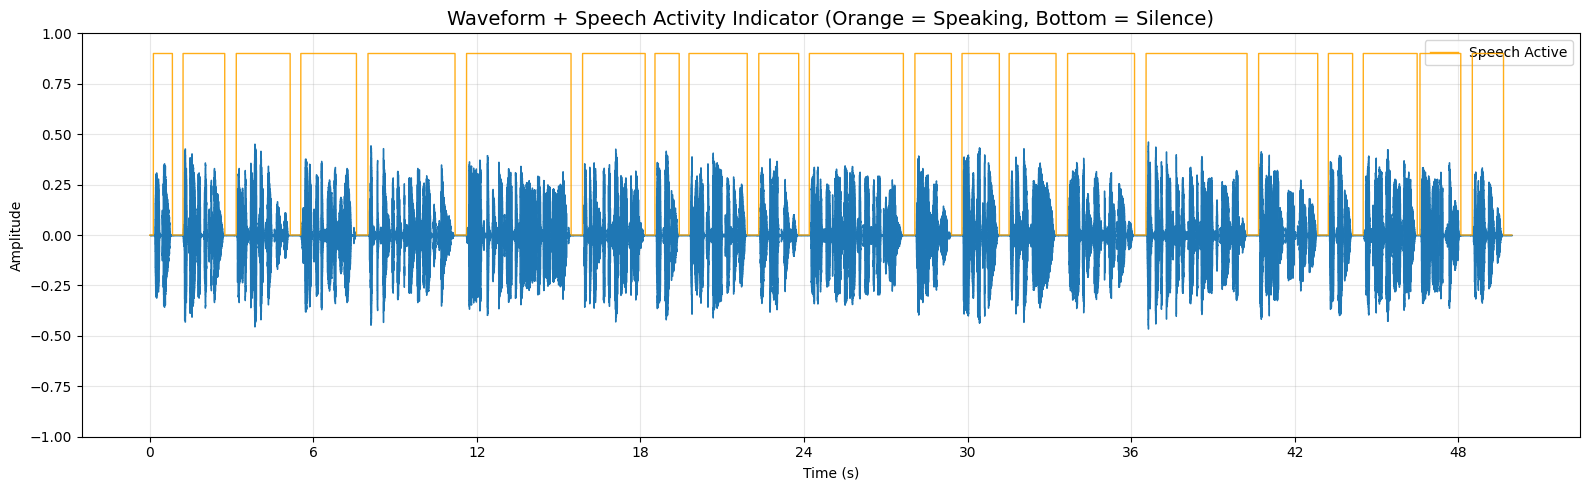


==== 播放每段语音并绘制波形图 ====

语音段 1: 0.13s ~ 0.83s (duration=0.70s)


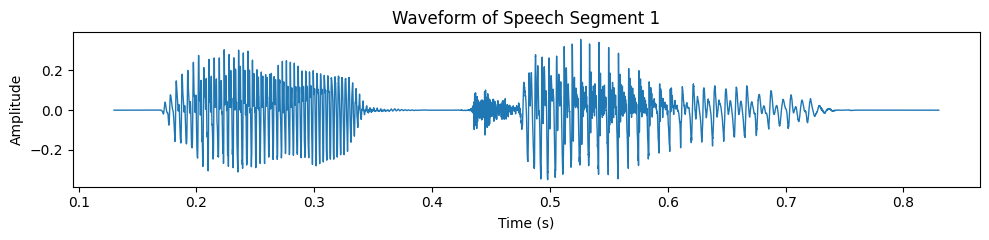


语音段 2: 1.22s ~ 2.75s (duration=1.53s)


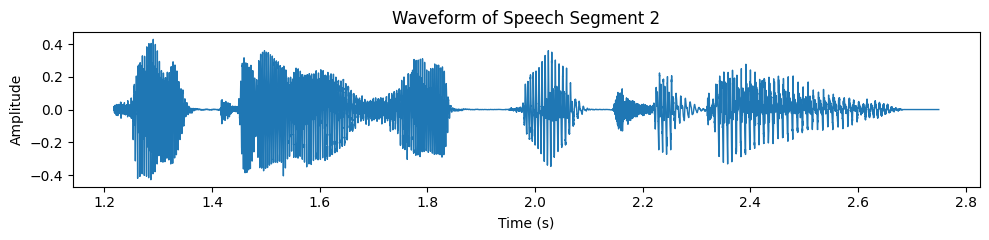


语音段 3: 3.17s ~ 5.15s (duration=1.98s)


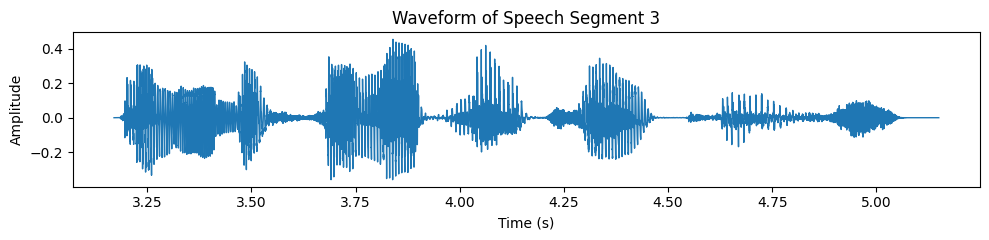


语音段 4: 5.54s ~ 7.58s (duration=2.04s)


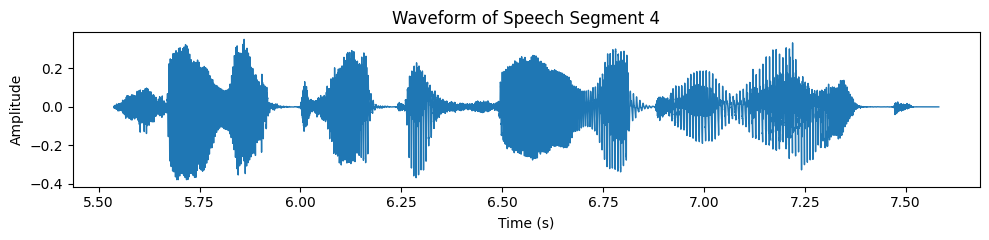


语音段 5: 8.00s ~ 11.20s (duration=3.20s)


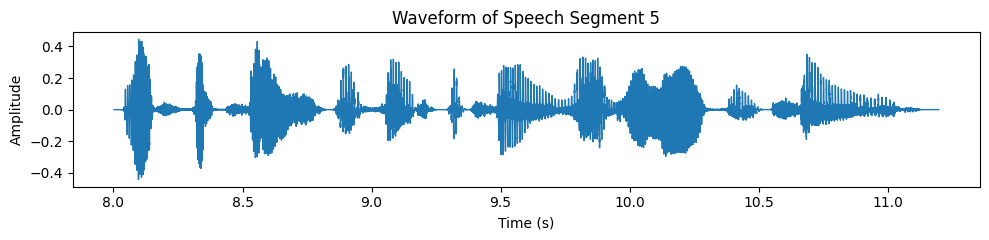


语音段 6: 11.62s ~ 15.45s (duration=3.84s)


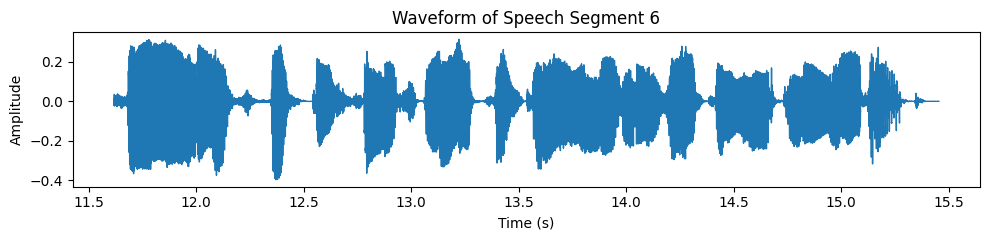


语音段 7: 15.87s ~ 18.17s (duration=2.30s)


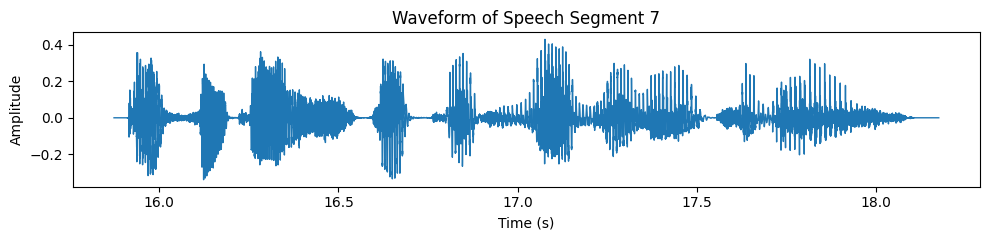


语音段 8: 18.53s ~ 19.42s (duration=0.89s)


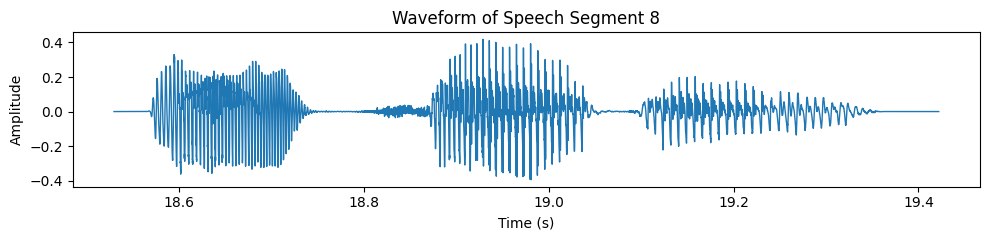


语音段 9: 19.78s ~ 21.92s (duration=2.14s)


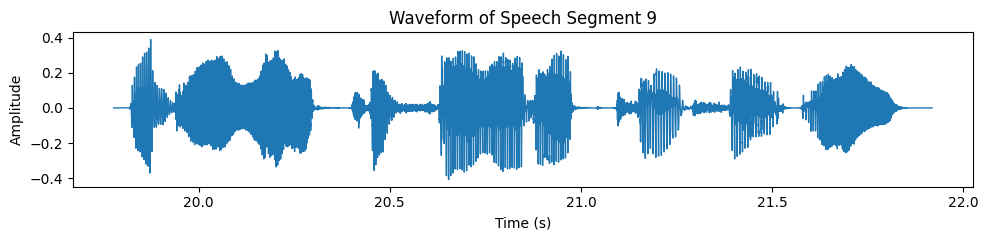


语音段 10: 22.34s ~ 23.81s (duration=1.47s)


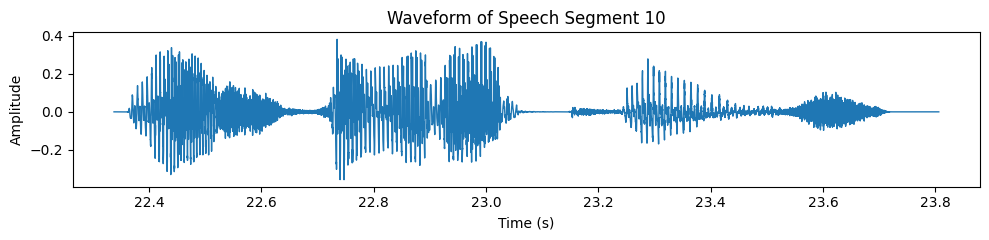


语音段 11: 24.19s ~ 27.65s (duration=3.45s)


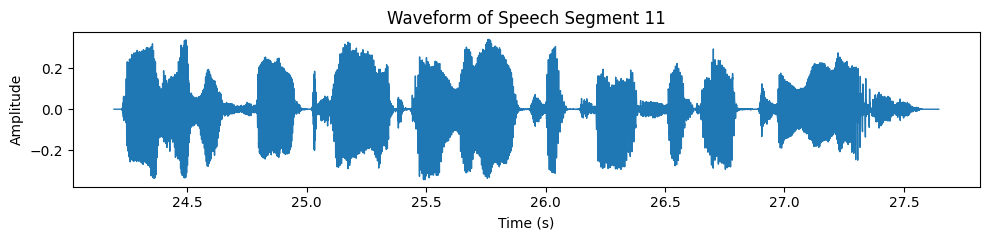


语音段 12: 28.07s ~ 29.41s (duration=1.34s)


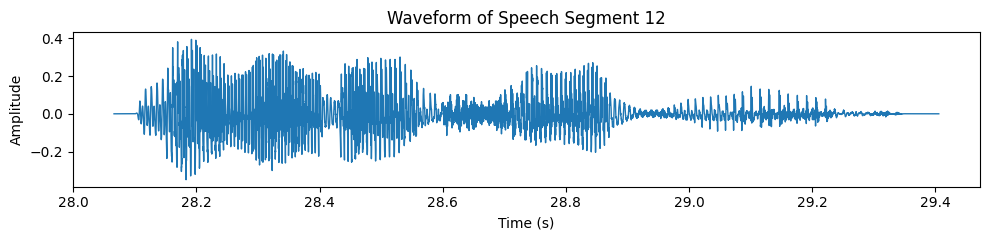


语音段 13: 29.79s ~ 31.17s (duration=1.37s)


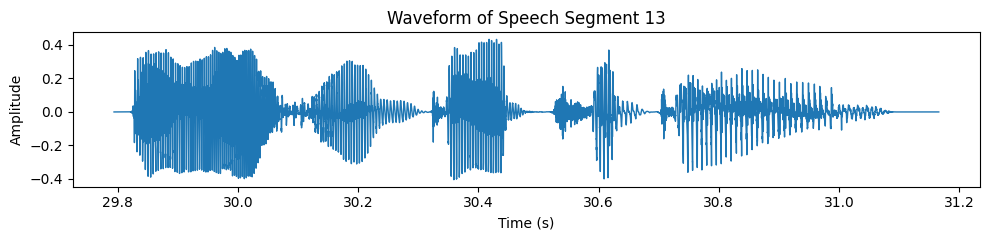


语音段 14: 31.52s ~ 33.25s (duration=1.72s)


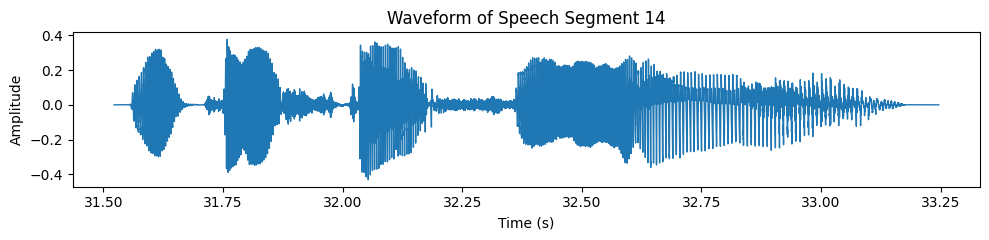


语音段 15: 33.67s ~ 36.13s (duration=2.46s)


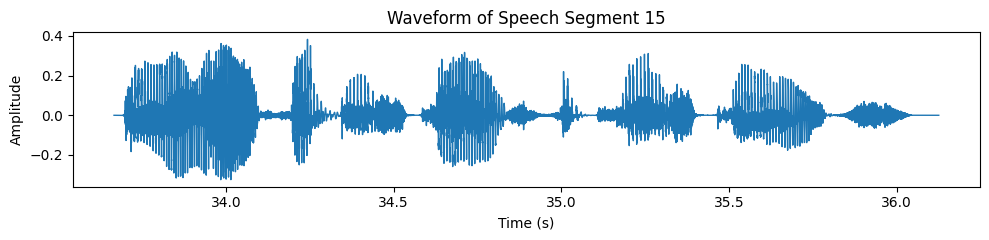


语音段 16: 36.55s ~ 40.25s (duration=3.71s)


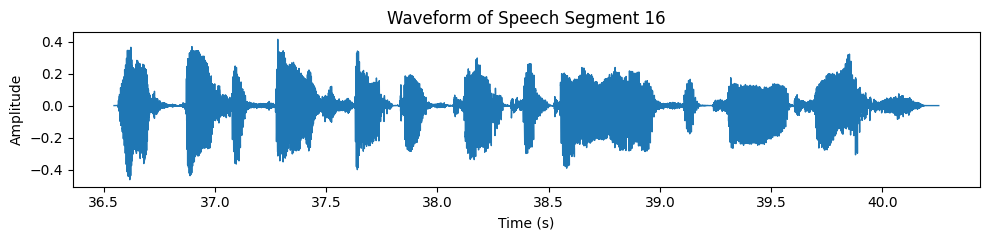


语音段 17: 40.67s ~ 42.85s (duration=2.17s)


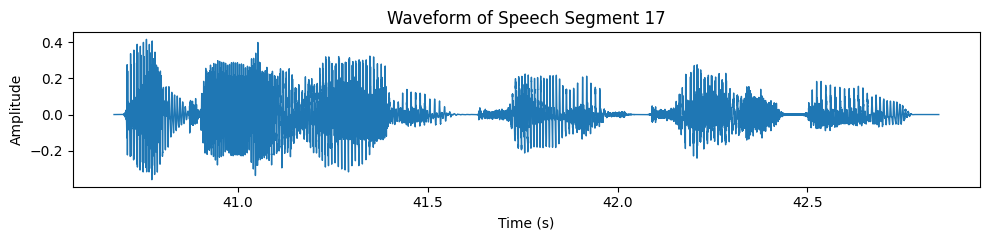


语音段 18: 43.23s ~ 44.13s (duration=0.89s)


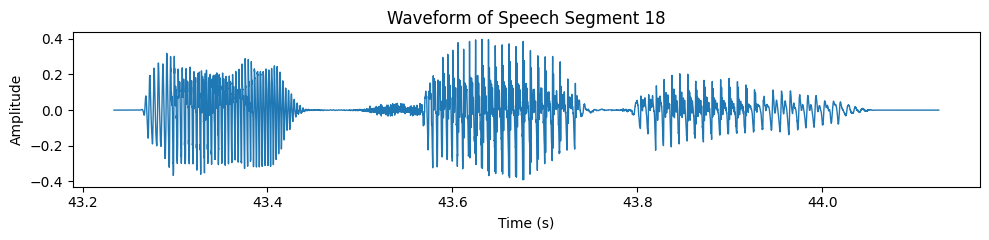


语音段 19: 44.51s ~ 46.49s (duration=1.98s)


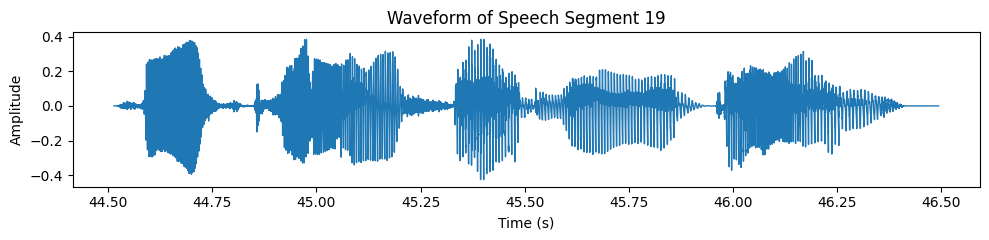


语音段 20: 46.59s ~ 48.09s (duration=1.50s)


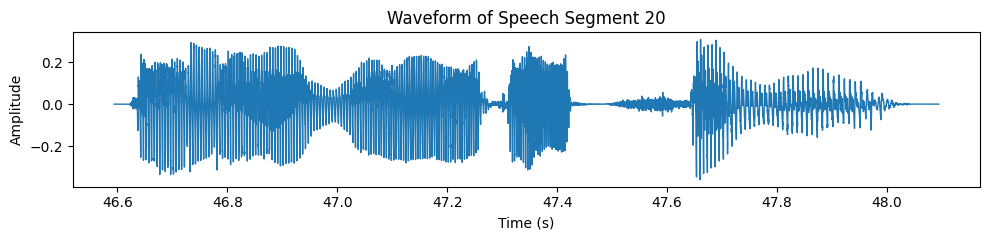


语音段 21: 48.51s ~ 49.66s (duration=1.15s)


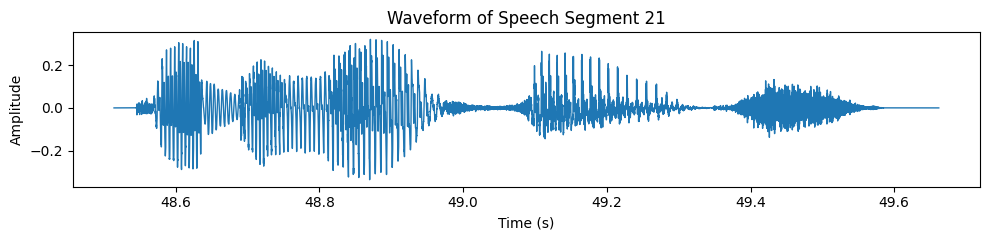

In [3]:
# ========= 加载 Silero VAD 模型 =========
model, utils = torch.hub.load(
    repo_or_dir='snakers4/silero-vad',
    model='silero_vad',
    force_reload=False
)

(get_speech_timestamps,
 save_audio,
 read_audio,
 VADIterator,
 collect_chunks) = utils

# ========= 使用 Silero VAD 获取语音段 =========
speech_timestamps = get_speech_timestamps(y, model, sampling_rate=sr)

# 结果形式为：
# [{'start':1600,'end':4800}, {'start':7100,'end':10200}, ...]


# ========= 转换为秒 =========
segments_speech = [
    (ts["start"] / sr, ts["end"] / sr)
    for ts in speech_timestamps
]

print("==== 有声音的音频段落 ====")
for i, (s, e) in enumerate(segments_speech):
    print(f"Speech {i+1}: start={s:.2f}s, end={e:.2f}s, duration={e-s:.2f}s")


# ========= 绘制波形 + 清晰的“语音活性条（有声高 / 静音低） =========
plt.figure(figsize=(16, 5))

# 1. 先画波形
librosa.display.waveshow(y, sr=sr, zorder=5)

# 2. 绘制语音活性指示条（最醒目）
#   语音的地方画 y=0.9 的橘色横线，静音画 y=0 的细线(高低横线活性条)
duration = len(y) / sr
time_axis = np.linspace(0, duration, len(y))

# 创建一个全为0的数组，表示默认静音
activity = np.zeros_like(y)

# 把所有有语音的样本位置设为 0.9
for start_sec, end_sec in segments_speech:
    start_sample = int(start_sec * sr)
    end_sample   = int(end_sec * sr)
    activity[start_sample:end_sample] = 0.9

# 画出这个“活性条”，用粗线条盖在最上面
plt.plot(time_axis, activity, color='orange', linewidth=1, alpha=0.9, label='Speech Active', zorder=10)

plt.title("Waveform + Speech Activity Indicator (Orange = Speaking, Bottom = Silence)", fontsize=14)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.ylim(-1.0, 1.0)  # 保持波形完整显示
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ========= 播放每段语音，并画该段波形 =========
print("\n==== 播放每段语音并绘制波形图 ====")

for i, (s, e) in enumerate(segments_speech):
    print(f"\n语音段 {i+1}: {s:.2f}s ~ {e:.2f}s (duration={e-s:.2f}s)")

    start_sample = int(s * sr)
    end_sample = int(e * sr)
    segment_data = y[start_sample:end_sample]

    # 播放
    display(Audio(segment_data, rate=sr))

    # 局部波形图
    plt.figure(figsize=(10, 2.5))
    t = np.linspace(s, e, len(segment_data))
    plt.plot(t, segment_data, linewidth=1)
    plt.title(f"Waveform of Speech Segment {i+1}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()
